<a href="https://colab.research.google.com/github/b-1129/b-1129-Fashion_MNIST_CNN_Project/blob/main/Fashion_MNIST_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST CNN Classification

- Train MNIST on 60000 fashion MNIST images(Data in NP array)
- Test MNIST on 10000 fashion MNIST images(Data in NP array)

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot
'''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot\n'

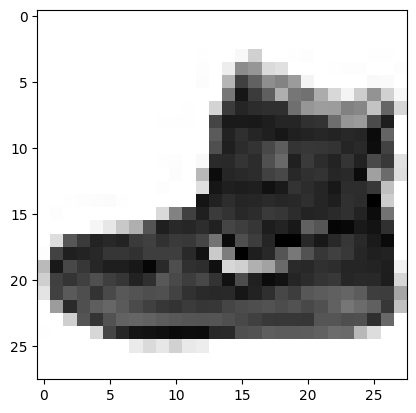

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

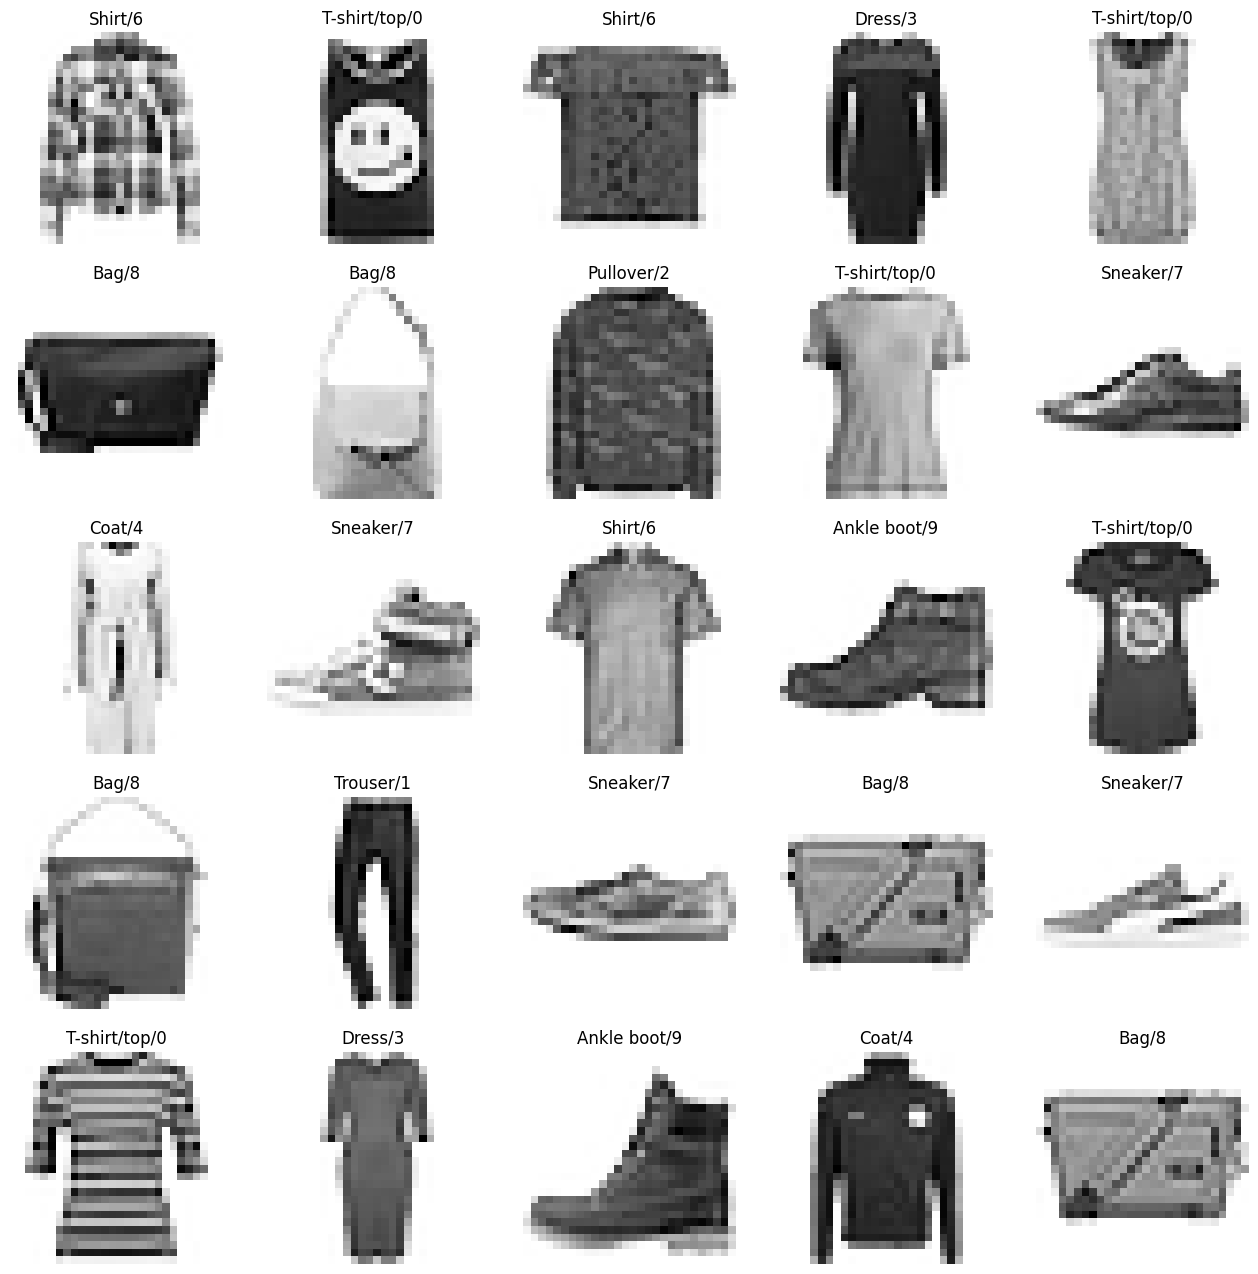

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+= 1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis("off")
  plt.title('{}/{}'.format(class_labels[y_train[i]], y_train[i]))

change the dimension


In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
## CNN Model Building

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters= 32, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.6860 - loss: 0.9373 - val_accuracy: 0.8434 - val_loss: 0.4378
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.8567 - loss: 0.4062 - val_accuracy: 0.8686 - val_loss: 0.3696
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 357ms/step - accuracy: 0.8767 - loss: 0.3533 - val_accuracy: 0.8846 - val_loss: 0.3246
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 320ms/step - accuracy: 0.8905 - loss: 0.3095 - val_accuracy: 0.8919 - val_loss: 0.3062
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 501ms/step - accuracy: 0.8977 - loss: 0.2864 - val_accuracy: 0.8813 - val_loss: 0.3249
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.9005 - loss: 0.2781 - val_accuracy: 0.8947 - val_loss: 0.2942
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 392ms/step - accuracy: 0.9116 - loss: 0.2531 - val_accuracy: 0.8994 - val_loss: 0.2852
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 283ms/step - accuracy: 0.9128 - loss: 0.2462 - val_accu

In [ ]:
## test a model

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


9

In [ ]:
y_test[0]

9

In [ ]:
y_pred= model.predict(X_test).round(2)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.07, 0.  ]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9012 - loss: 0.2751


[0.2746177613735199, 0.8996000289916992]

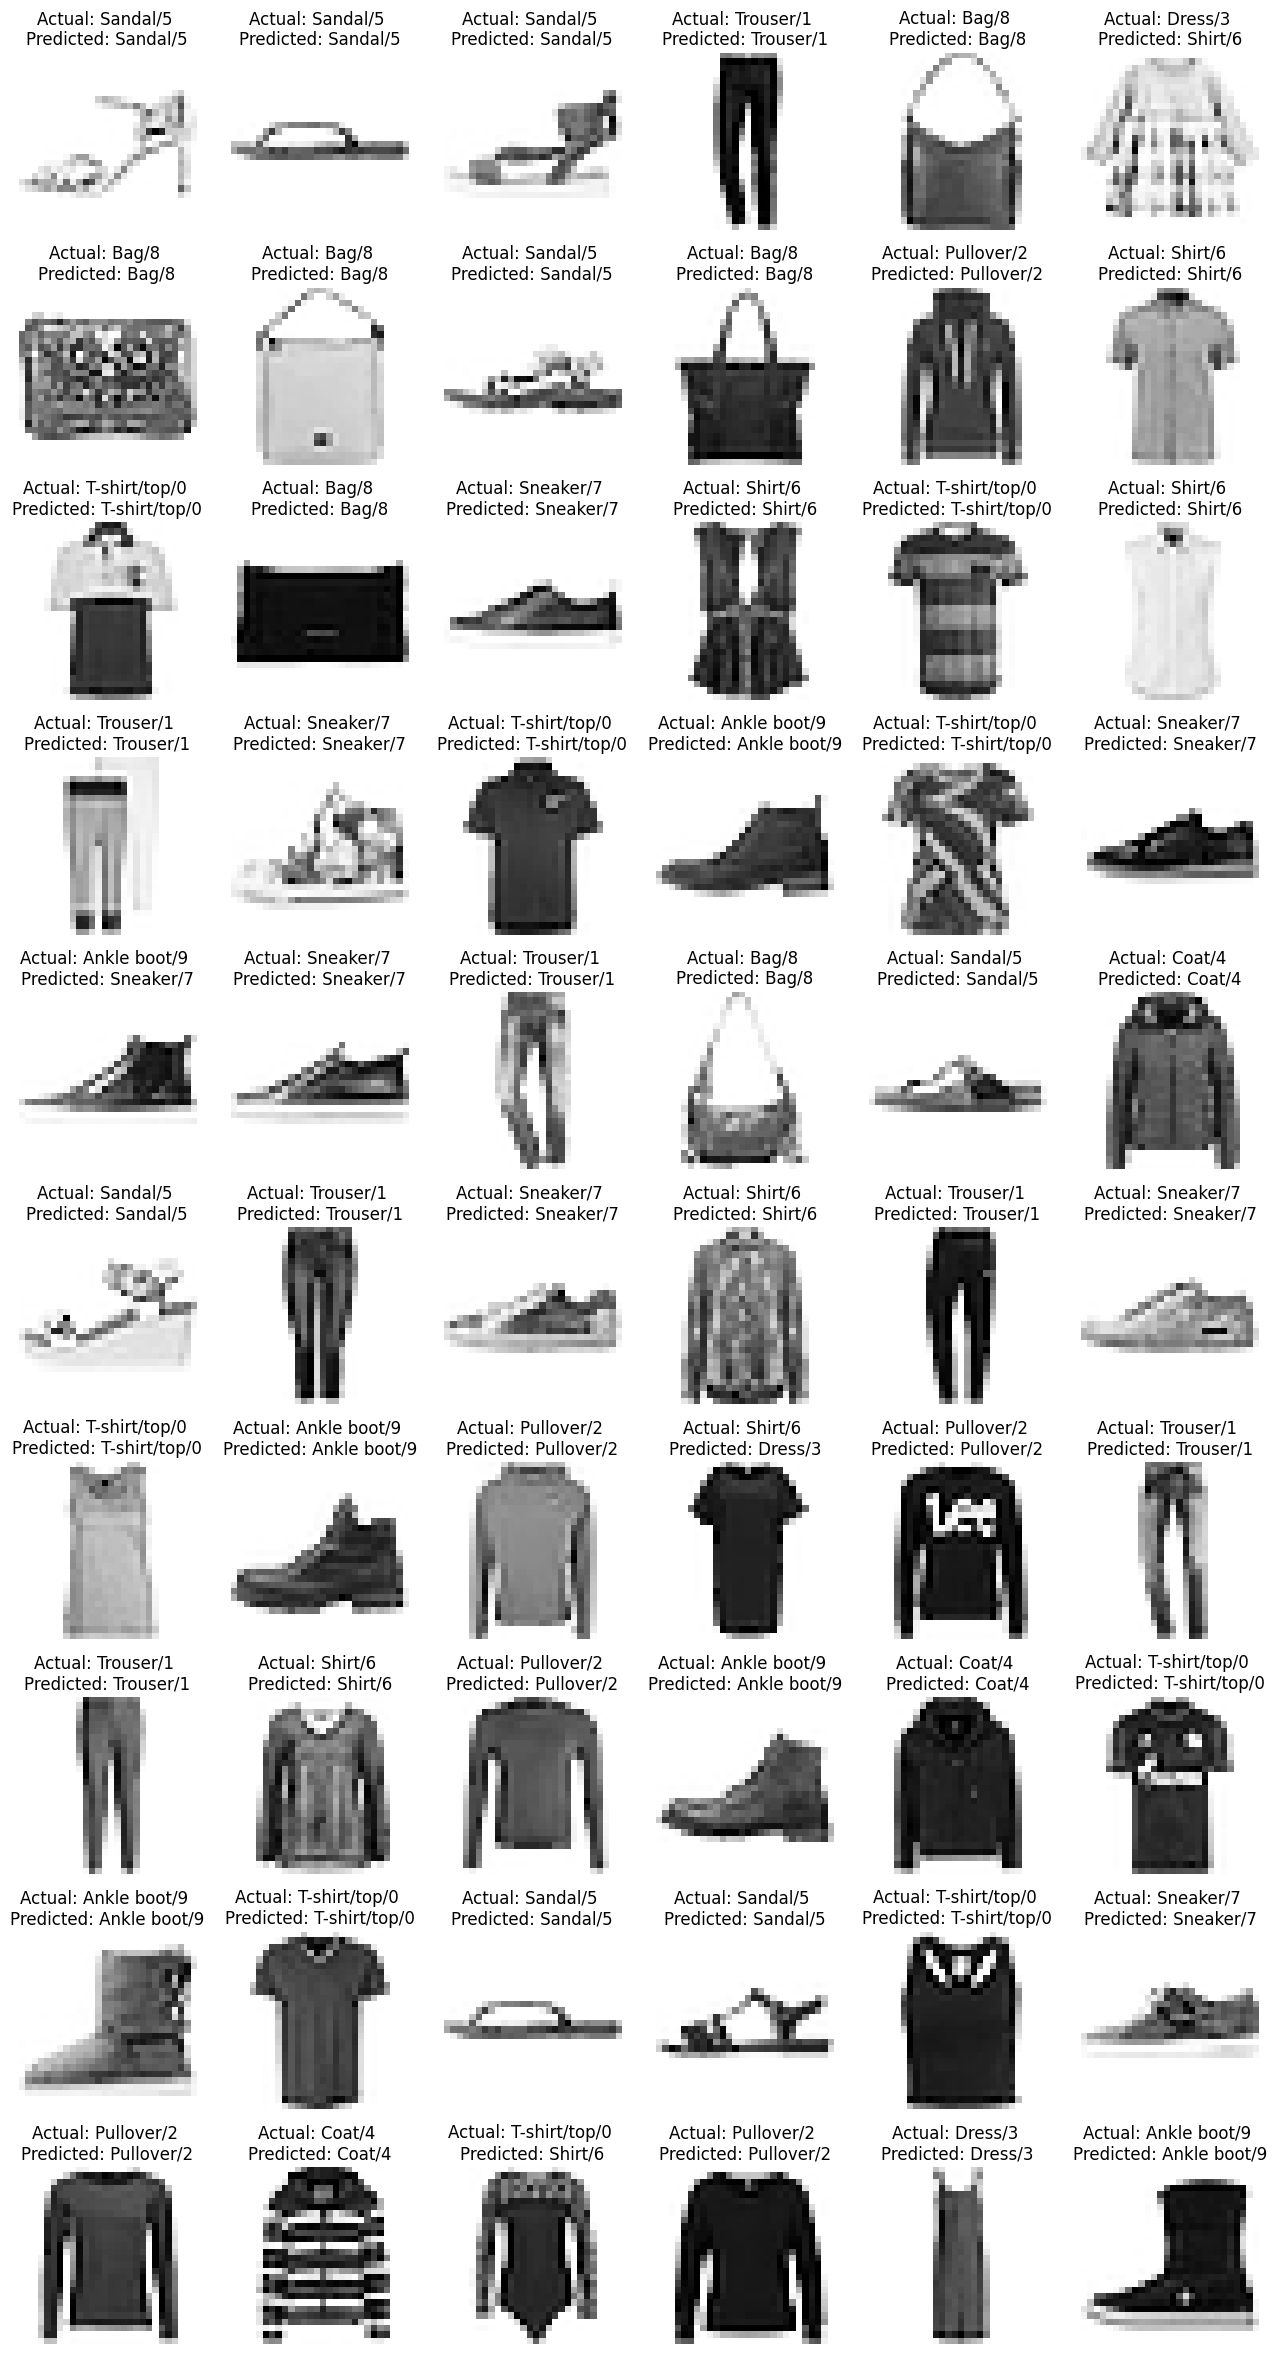

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap="Greys")
  plt.title("Actual: {}/{} \nPredicted: {}/{}".format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis("off")


<Axes: >

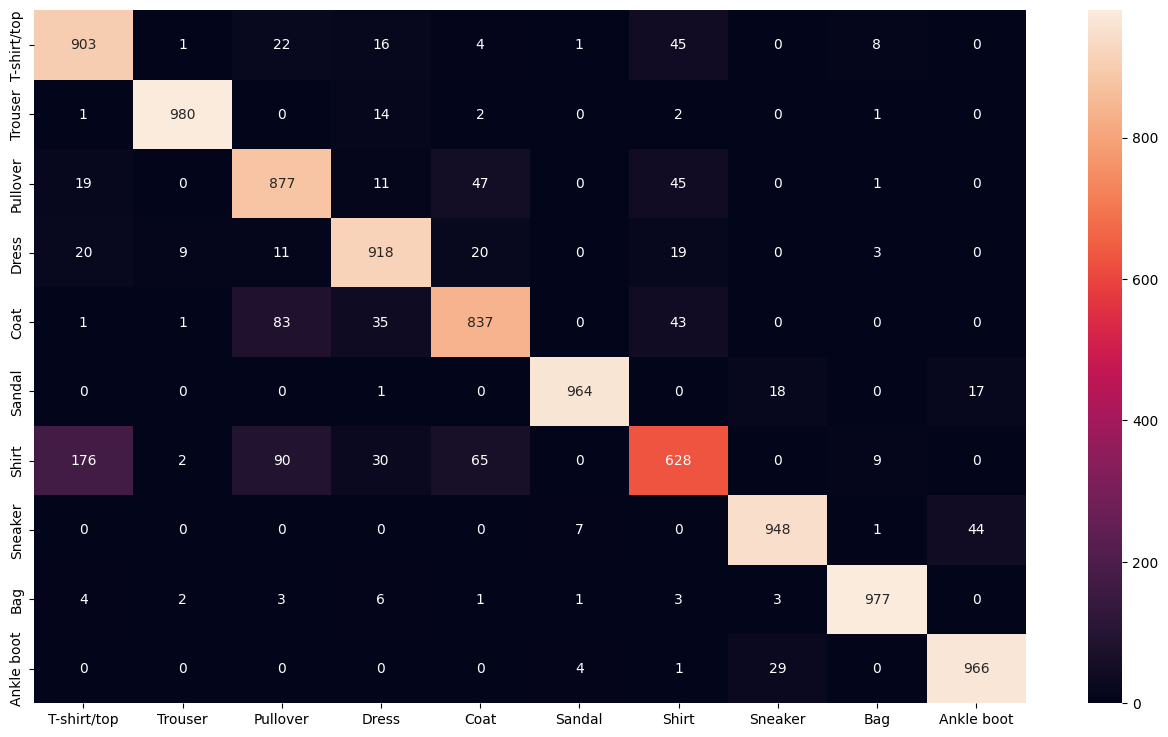

In [ ]:
#Confusion Metrics
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
max_y_pred_label = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, max_y_pred_label)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, max_y_pred_label, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.90      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.88      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.86      0.84      0.85      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.80      0.63      0.70      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
## save model

In [ ]:
model.save("fashion_classification_CNN_model.h5")

In [ ]:
path = "/content/drive/MyDrive/fashion_classification_CNN_model.h5"
model.save(path)

In [ ]:
model_deploy = keras.models.load_model("fashion_classification_CNN_model.h5")

In [ ]:
model_deploy.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.07, 0.  ]], dtype=float32)

In [ ]:
model_deploy.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [ ]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


9